## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mouse = combined_df["Mouse ID"].count()
count_mouse

1893

In [3]:
#Number of unique mouse
count_mouse1 = combined_df["Mouse ID"].nunique()
count_mouse1

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df.loc[combined_df["Mouse ID"] == "g989"]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_rows)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_df['Mouse ID'].nunique()
count_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = clean_df.groupby("Drug Regimen")
mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
median = drug_regimen_group['Tumor Volume (mm3)'].median()
variance = drug_regimen_group['Tumor Volume (mm3)'].var()
standard_dv =drug_regimen_group['Tumor Volume (mm3)'].std()
sem =drug_regimen_group['Tumor Volume (mm3)'].sem()

regimen_summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dv,"SEM":sem})
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
T_data = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
T_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0, 0.5, 'total number of timepoints')

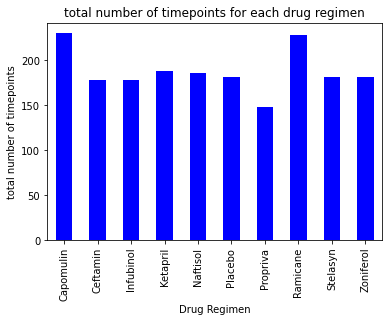

In [23]:
bar = T_data.plot(kind ="bar",title = "total number of timepoints for each drug regimen",facecolor = "blue")
bar.set_ylabel("total number of timepoints")

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
ti_data = clean_df.groupby("Drug Regimen")["Timepoint"].count()
ti_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

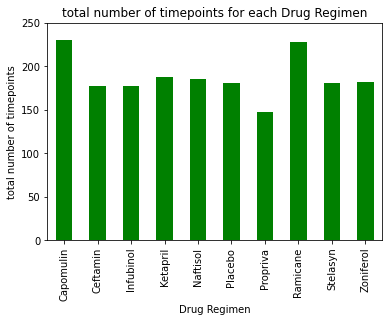

In [25]:
x_axis = np.arange(0, len(ti_data))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("total number of timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("total number of timepoints")

plt.xlim(-0.5, len(ti_data)-0.5)
plt.ylim(0,ti_data.max() +20)

plt.bar(ti_data.index, ti_data, facecolor="green",align="center",width=0.5)
plt.xticks(tick_locations, ti_data.index,rotation="vertical")
plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
mouse_gender

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


Male      125
Female    123
Name: Sex, dtype: int64

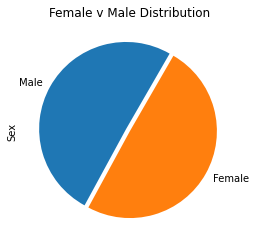

In [29]:
colors = ["blue","orange"]
explode=(0.05,0)

sex_distribution = mouse_gender["Sex"].value_counts()
s = sex_distribution.plot(kind="pie", title="Female v Male Distribution", startangle=60, explode=explode)
sex_distribution

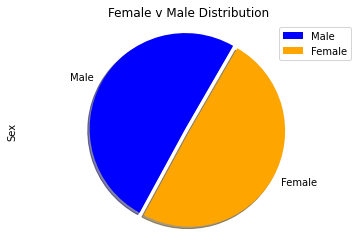

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution,labels = sex_distribution.index,colors = colors,shadow = True, startangle = 60, explode = explode)
plt.axis("equal")
plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [34]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_df = pd.merge(clean_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])
vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for drug in treatments:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    

    iqr = quartiles[0.75] - quartiles[0.25]
   

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    

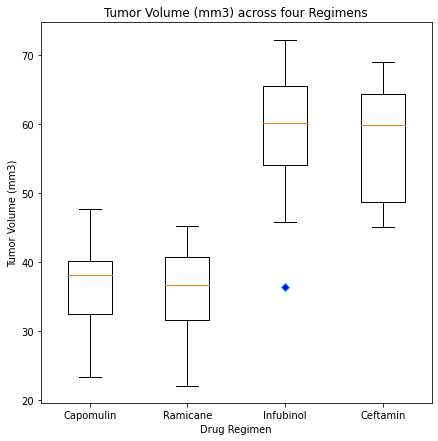

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(treatments) + 1),ticklabels = treatments)

plt.show()

## Line and Scatter Plots

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
C_data = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
C_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
126,r554,Capomulin,Female,8,17,5,45.781746,1


In [45]:
random_data = pd.merge(clean_df, C_data, on="Mouse ID", how="inner")
random_data

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,r554,Capomulin,Female,8,17,0,45.000000,0,Capomulin,Female,8,17,5,45.781746,1
1,r554,Capomulin,Female,8,17,5,45.781746,1,Capomulin,Female,8,17,5,45.781746,1
2,r554,Capomulin,Female,8,17,10,39.005494,2,Capomulin,Female,8,17,5,45.781746,1
3,r554,Capomulin,Female,8,17,15,35.463758,2,Capomulin,Female,8,17,5,45.781746,1
4,r554,Capomulin,Female,8,17,20,36.015589,2,Capomulin,Female,8,17,5,45.781746,1
5,r554,Capomulin,Female,8,17,25,33.893345,3,Capomulin,Female,8,17,5,45.781746,1
6,r554,Capomulin,Female,8,17,30,32.680655,3,Capomulin,Female,8,17,5,45.781746,1
7,r554,Capomulin,Female,8,17,35,33.069337,3,Capomulin,Female,8,17,5,45.781746,1
8,r554,Capomulin,Female,8,17,40,31.804841,3,Capomulin,Female,8,17,5,45.781746,1
9,r554,Capomulin,Female,8,17,45,32.377357,3,Capomulin,Female,8,17,5,45.781746,1


In [46]:
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)
random_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x
0,r554,Capomulin,Female,8,17,0,45.000000,0
1,r554,Capomulin,Female,8,17,5,45.781746,1
2,r554,Capomulin,Female,8,17,10,39.005494,2
3,r554,Capomulin,Female,8,17,15,35.463758,2
4,r554,Capomulin,Female,8,17,20,36.015589,2
5,r554,Capomulin,Female,8,17,25,33.893345,3
6,r554,Capomulin,Female,8,17,30,32.680655,3
7,r554,Capomulin,Female,8,17,35,33.069337,3
8,r554,Capomulin,Female,8,17,40,31.804841,3
9,r554,Capomulin,Female,8,17,45,32.377357,3


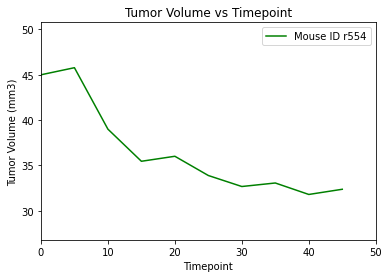

In [47]:
time = random_df["Timepoint_x"]
vol = random_df["Tumor Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.show()

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [49]:
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
tvolume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [50]:
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()
mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [51]:
mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


In [52]:
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
mouse_vol_wt

,Avg Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


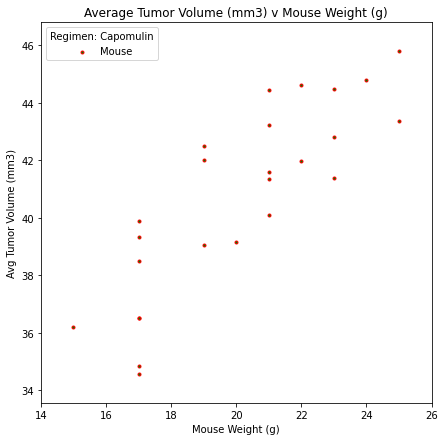

In [57]:
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(wt, vol, marker=".", facecolors="green", edgecolors="red")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {corr_coef}")

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84


y = 0.95x + 21.55


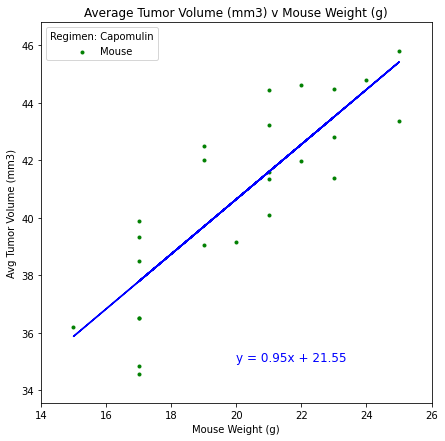

In [61]:
#linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(wt, vol)

#create equation of line
line = slope * wt + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(line_eq)

#plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(wt, vol, marker=".", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")

plt.plot(wt, line, 'b-')
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.annotate(line_eq, (20,35), fontsize=12, color="blue")
plt.show()